In [1]:
!pip install pyjanitor pyvis --quiet

In [2]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [4]:
df_ori = pd.read_csv("D:/LinkedinDataProject/Connections.csv", skiprows=2)

In [5]:
df_ori.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     278 non-null    object
 1   Last Name      278 non-null    object
 2   Email Address  4 non-null      object
 3   Company        150 non-null    object
 4   Position       150 non-null    object
 5   Connected On   279 non-null    object
dtypes: object(6)
memory usage: 13.2+ KB


In [6]:
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

,company,position,connected_on
0,Morgan Stanley,Senior Executive - Talent Acquisition,2022-12-30
1,Delhi Metro Rail Corporation Limited,Human Resources Manager,2022-12-30
2,Capgemini,Software Engineer,2022-12-30
3,Accenture,Web Developer,2022-12-30
4,Tecspeak IT Solutions,Software Developer,2022-12-30


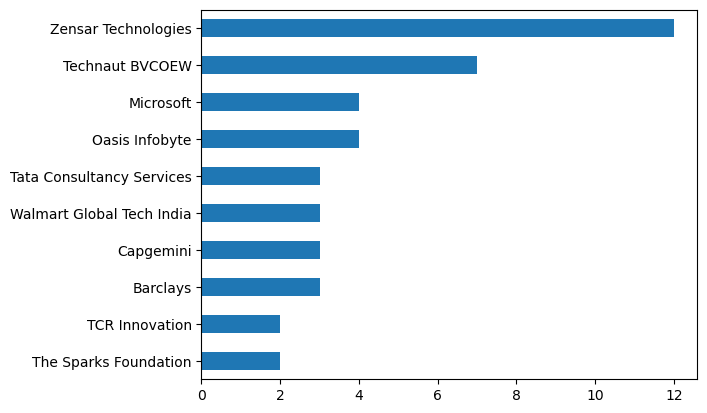

In [7]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

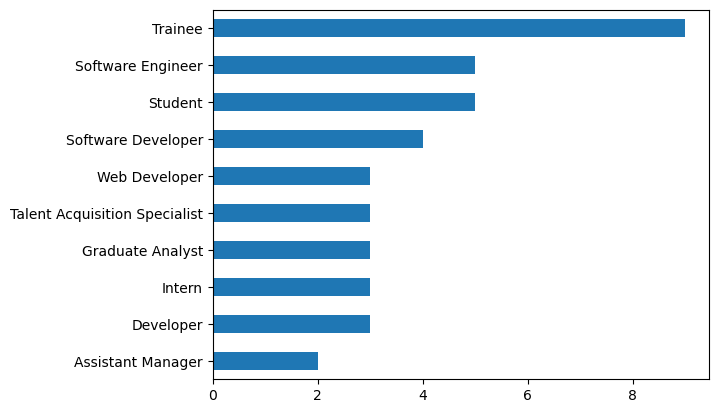

In [9]:
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

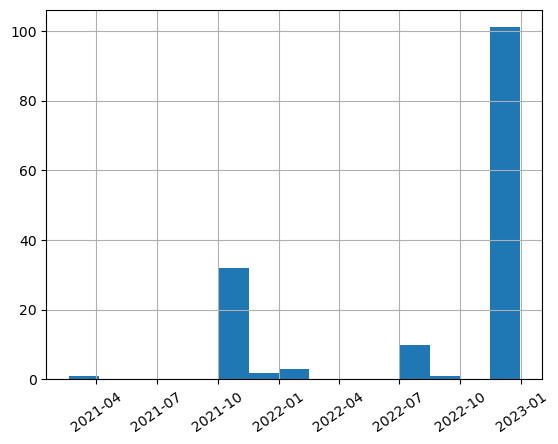

In [10]:
df['connected_on'].hist(xrot=35, bins=15);

In [11]:
pattern = "freelance|self-employed"
df = df[~df['company'].str.contains(pattern, case=False)]

In [12]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

,company,count
0,Zensar Technologies,12
1,Technaut BVCOEW,7
2,Microsoft,4
3,Oasis Infobyte,4
4,Capgemini,3
5,Barclays,3
6,Walmart Global Tech India,3
7,Tata Consultancy Services,3
12,The Sparks Foundation,2
16,"Aakaar, IIT Bombay",2


In [13]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Trainee,9
1,Software Engineer,5
2,Software Developer,4
3,Web Developer,3
4,Talent Acquisition Specialist,3
5,Graduate Analyst,3
6,Intern,3
7,Developer,3
8,Student,3
15,Talent Acquisition Executive,2


In [15]:
print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

number of nodes: 4
number of edges: 3


In [16]:
for _, row in df_company.head(5).iterrows():
  print(row['company'] + "-" + str(row['count']))

Zensar Technologies-12
Technaut BVCOEW-7
Microsoft-4
Oasis Infobyte-4
Capgemini-3


In [17]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(107, 2)
(2, 2)
